In [0]:
import os
from google.colab import drive, files
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from tensorflow import keras
from keras.preprocessing import image

import requests
import urllib.request
import ssl
import shutil
import time
from PIL import Image
import cv2
from google.colab.patches import cv2_imshow
from keras.preprocessing.image import ImageDataGenerator



Using TensorFlow backend.


In [0]:
drive.mount('/content/gdrive')
root_path = '/content/gdrive/My Drive/sneakerClassification/'

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
shoe_names = ['jordan1', 'jordan2',
              'jordan3', 'jordan4',
              'jordan5', 'jordan6',
              'jordan7', 'jordan8',
              'jordan9', 'jordan10',
              'jordan11', 'jordan12',
              'jordan13', 'jordan14',
              'af1']

shoe_names_index = [0, 3, 10 ,14]
shoe_names_sub = [shoe_names[i] for i in shoe_names_index]
shoe_classes = np.array(shoe_names_sub)


In [0]:
ssl._create_default_https_context = ssl._create_unverified_context
user_agent = 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_14_6) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/79.0.3945.130 Safari/537.36'
headers = {'User-Agent': user_agent}

!mkdir -p sneakerClassification/training
!cd

def downloadTrainImages():
  for shoe_name in shoe_names_sub:
    print('Downloading images for {}'.format(shoe_name))
    !mkdir sneakerClassification/training/$shoe_name
    url_file = open(root_path + 'sneakerClassificationURLs/{}.txt'.format(shoe_name))
    shoe_dir = '/content/sneakerClassification/training/{}/'.format(shoe_name)
    print(shoe_dir)
    index = 0
    
    for line in url_file:
      try:
        req = urllib.request.Request(line, None, headers)
        response = urllib.request.urlopen(req, timeout = 30)
        img = Image.open(response)
        img.save(shoe_dir + '{0}_{1}.png'.format(shoe_name, index))
        print('Index {}:'.format(index) + line)
      except urllib.error.HTTPError:
        print('Index {}: HTTP Error'.format(index))
      except OSError:
        print('Index {}: OS Error'.format(index))
      index += 1

downloadTrainImages() 


/content/sneakerClassification/training/jordan1/
Index 0:https://www.newjordans2018.com/wp-content/uploads/2018/08/Air-Jordan-1-Retro-High-OG-Sports-Illustrated-Black-White-Green.jpg

Index 1:https://c.static-nike.com/a/images/t_PDP_1280_v1/f_auto/n6emfdrrnssozw6vz6au/air-jordan-1-mid-shoe-BpARGV.jpg

Index 2:https://stockx-360.imgix.net/Air-Jordan-1-Retro-High-Bred-Toe/Images/Air-Jordan-1-Retro-High-Bred-Toe/Lv2/img01.jpg?auto=format,compress&w=559&q=90&dpr=2&updated_at=1538080256

Index 3:https://stockx.imgix.net/Air-Jordan-1-Retro-High-Bloodlines.jpg?fit=fill&bg=FFFFFF&w=700&h=500&auto=format,compress&q=90&dpr=2&trim=color&updated_at=1573759145

Index 4:https://c.static-nike.com/a/images/t_PDP_1280_v1/f_auto/ttgzu8bcc0bnqpuu3wre/air-jordan-1-mid-shoe-1zMCFJ.jpg

Index 5:https://szopex.blob.core.windows.net/shops/media/f1000/2019/jordan/161924/air-jordan-1-retro-high-og-555088-062-5de0fe3f24173.png.png

Index 6:https://www.flightclub.com/media/catalog/product/cache/1/image/1600x1140/

In [0]:
!mkdir -p sneakerClassification/valid
!cd

def downloadValidationImages():
  for shoe_name in shoe_names_sub:
    print('Downloading validation images for {}'.format(shoe_name))
    !mkdir sneakerClassification/valid/$shoe_name
    url_file = open(root_path + 'sneakerClassificationValidURLs/{}_valid.txt'.format(shoe_name))
    shoe_dir = '/content/sneakerClassification/valid/{}/'.format(shoe_name)
    print(shoe_dir)
    index = 0
    
    for line in url_file:
      try:
        req = urllib.request.Request(line, None, headers)
        response = urllib.request.urlopen(req, timeout = 30)
        img = Image.open(response)
        img.save(shoe_dir + '{0}_{1}.png'.format(shoe_name, index))
        print('Index {}:'.format(index) + line)
      except urllib.error.HTTPError:
        print('Index {}: HTTP Error'.format(index))
      except OSError:
        print('Index {}: OS Error'.format(index))
      index += 1

downloadValidationImages()


/content/sneakerClassification/valid/jordan1/
Index 0:https://www.kicksonfire.com/wp-content/uploads/2020/04/Air-Jordan-1-High-OG-Black-Game-Royal-1-1-565x372.jpg?x27652

Index 1:https://www.deadstock.de/wp-content/uploads/2019/04/travis-scott-nike-air-jordan-1-1.jpg

Index 2:https://media.endclothing.com/media/catalog/product/a/i/air-jordan-1-retro-high-zoom---white-_-racer-blue---_ck6637-104_1.jpg

Index 3:https://www.retrojordannew.com/wp-content/uploads/2018/09/buy-air-jordan-1-chicago-varsity-red-shoes-online-555088-101.jpg

Index 4:https://sneakernews.com/wp-content/uploads/2020/04/Air-Jordan-1-Game-Royal-2020-555088_041-5.jpg

Index 5:https://dailysole.com/wp-content/uploads/2019/12/Air-Jordan-1-Zoom-R2T-White-Racer-Blue-CK6637-104-Release-Date.jpg

Index 6:https://szopex.blob.core.windows.net/shops/media/f1000/2019/jordan/161924/air-jordan-1-retro-high-og-555088-062-5de0fe5c38733.png.png

Index 7:https://www.shelflife.co.za/pics/blog/large/air-jordan-1-track-red-555088-112.jpg


In [0]:
data_dir = '/content/sneakerClassification/training'
shoe_classes = np.array([item.name for item in os.scandir(data_dir)])
print(shoe_classes)

image_size = (250, 250)
batch_size = 32
validation_size = 16

def gen_train_dataset():
  data_dir = '/content/sneakerClassification/training'
  image_generator = ImageDataGenerator(rescale = 1./255)
  return image_generator.flow_from_directory(directory=str(data_dir),
                                                      batch_size=batch_size,
                                                      shuffle=True,
                                                      target_size=image_size,
                                                      classes = list(shoe_classes)) 
def gen_valid_dataset():
  data_dir = '/content/sneakerClassification/valid'
  image_generator = ImageDataGenerator(rescale = 1./255)
  return image_generator.flow_from_directory(directory=str(data_dir),
                                                      batch_size=validation_size,
                                                      shuffle=True,
                                                      target_size=image_size,
                                                      classes = list(shoe_classes))             
def find_num_images():
    train_dir = '/content/sneakerClassification/training'
    valid_dir = '/content/sneakerClassification/valid'
    train_total = 0
    valid_total = 0
    for i in shoe_classes:
      train_total += len([item.name for item in os.scandir(os.path.join(train_dir, i))])
      valid_total += len([item.name for item in os.scandir(os.path.join(valid_dir, i))])
    return train_total, valid_total

num_images_train, num_images_valid = find_num_images()
training_dataset = gen_train_dataset()
validation_dataset = gen_valid_dataset()

['jordan4' 'jordan1' 'af1' 'jordan11']
Found 664 images belonging to 4 classes.
Found 58 images belonging to 4 classes.


In [0]:
def displayDataset(dataset):
  image_batch, label_batch = next(dataset)

  for i in range(8):
    ax = plt.subplot(2, 4, i+1)
    ax.title.set_text(shoe_classes[np.argmax(label_batch[i])])
    ax.imshow(image_batch[i])
  

In [0]:
model = tf.keras.Sequential()

model.add(tf.keras.layers.Conv2D(32, kernel_size = (3,3), input_shape=(image_size[0], image_size[1], 3)))
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Conv2D(64, kernel_size = (3,3)))
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Conv2D(128, kernel_size = (3,3)))
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(64, activation = 'relu'))
model.add(tf.keras.layers.Dense(4, activation = "softmax"))


model.compile(optimizer = 'adam',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

print(model.summary())

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_29 (Conv2D)           (None, 248, 248, 32)      896       
_________________________________________________________________
activation_29 (Activation)   (None, 248, 248, 32)      0         
_________________________________________________________________
max_pooling2d_29 (MaxPooling (None, 124, 124, 32)      0         
_________________________________________________________________
dropout_29 (Dropout)         (None, 124, 124, 32)      0         
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 122, 122, 64)      18496     
_________________________________________________________________
activation_30 (Activation)   (None, 122, 122, 64)      0         
_________________________________________________________________
max_pooling2d_30 (MaxPooling (None, 61, 61, 64)      

In [0]:
model.fit(training_dataset, batch_size = 32, epochs=10, steps_per_epoch= math.ceil(num_images_train / batch_size),
          verbose=1, validation_data = validation_dataset, 
          validation_steps = math.ceil(num_images_valid / validation_size))



Epoch 1/10


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


21/21 [==============================] - 87s 4s/step - loss: 2.4723 - accuracy: 0.2681 - val_loss: 1.3853 - val_accuracy: 0.2931
Epoch 2/10
21/21 [==============================] - 87s 4s/step - loss: 1.3752 - accuracy: 0.3012 - val_loss: 1.3775 - val_accuracy: 0.4828
Epoch 3/10
21/21 [==============================] - 87s 4s/step - loss: 1.2432 - accuracy: 0.4654 - val_loss: 1.2454 - val_accuracy: 0.4483
Epoch 4/10
21/21 [==============================] - 87s 4s/step - loss: 1.0140 - accuracy: 0.6114 - val_loss: 1.1349 - val_accuracy: 0.5000
Epoch 5/10
21/21 [==============================] - 87s 4s/step - loss: 0.7560 - accuracy: 0.7229 - val_loss: 1.1823 - val_accuracy: 0.6207
Epoch 6/10
21/21 [==============================] - 86s 4s/step - loss: 0.5049 - accuracy: 0.8253 - val_loss: 1.1082 - val_accuracy: 0.6034
Epoch 7/10
21/21 [==============================] - 90s 4s/step - loss: 0.3300 - accuracy: 0.8901 - val_loss: 1.3493 - val_accuracy: 0.5690
Epoch 8/10
21/21 [=============

In [0]:
!mkdir -p sneakerClassification/testing
!cd

test_url_dir = root_path + 'sneakerClassificationTestURLs'
test_dir = '/content/sneakerClassification/testing'

def downloadTestImages():
  for url_file_name in os.listdir(test_url_dir):
    print('Downloading images for file {}'.format(url_file_name))
    url_file_formatted = url_file_name.split(".")[0]
    url_file = open(root_path + 'sneakerClassificationTestURLs/{}'.format(url_file_name))
    index = 0
    
    for line in url_file:
      try:
        req = urllib.request.Request(line, None, headers)
        response = urllib.request.urlopen(req, timeout = 30)
        img = Image.open(response)
        img.save(test_dir + '/{0}_{1}.png'.format(url_file_formatted, index))
        print('Index {}:'.format(index) + line)
      except urllib.error.HTTPError:
        print('Index {}: HTTP Error'.format(index))
      except OSError:
        print('Index {}: OS Error'.format(index))
      index += 1

downloadTestImages()

Index 0:https://stockx.imgix.net/Air-Jordan-4-Retro-Cool-Grey-2019-Product.jpg?fit=fill&bg=FFFFFF&w=700&h=500&auto=format,compress&q=90&dpr=2&trim=color&updated_at=1564168668

Index 1:https://cdn.flightclub.com/750/TEMPLATE/803833/1.jpg

Index 2:https://www.kicksonfire.com/wp-content/uploads/2015/08/Air-Jordan-1-Low-1.jpg

Index 3:https://www.withsneaker.com/wp-content/uploads/2019/04/2019-Nike-Air-Force-1-07-LV8-1-Mystic-Red-White-Black.jpg

Index 4:https://c.static-nike.com/a/images/t_prod_ss/w_480,c_limit,q_auto,f_auto/pfbljfz63onbr009awmr/air-jordan-1-retro-royal.jpg

Index 5:https://c.static-nike.com/a/images/t_prod_ss/w_960,c_limit,f_auto/aab05bdqkpx8tmwno53i/nike-air-jordan-4-retro-og-bred-release-date.jpg

Index 6:https://c.static-nike.com/a/images/t_prod_ss/w_480,c_limit,q_auto,f_auto/g35qh1pqd6mcqejmpgf1/air-jordan-11-concord-release-date.jpg


['jordan4', 'jordan1', 'af1', 'jordan11']
Predicting: test1_4.png
[[0. 1. 0. 0.]]
jordan1
Predicting: test1_1.png
[[0. 0. 0. 1.]]
jordan11
Predicting: test1_6.png
[[0. 0. 0. 1.]]
jordan11
Predicting: test1_5.png
[[0. 0. 1. 0.]]
af1


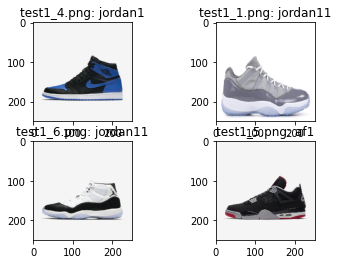

In [0]:

test_url_dir = root_path + 'sneakerClassificationTestURLs'
test_dir = '/content/sneakerClassification/testing'

classes = training_dataset.class_indices
class_keys = list(classes.keys())
print(class_keys)

index = 1
plot_index = 1
for test_img_name in os.listdir(test_dir):
  if ".ipynb_checkpoints" not in test_img_name and index <= 4:
    print("Predicting: " + test_img_name)
    img = image.load_img(os.path.join(test_dir, test_img_name), target_size=(image_size[0], image_size[1]))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)

    curr_image = np.vstack([x])
    print(model.predict(curr_image))
    prediction = np.argmax(model.predict(curr_image, batch_size=10), axis = -1)[0]
    ax = plt.subplot(2, 2, plot_index)
    print(class_keys[prediction])
    ax.title.set_text(test_img_name + ": " + class_keys[prediction])
    ax.imshow(img)
    plot_index += 1
  index += 1


In [0]:

model_name = 'shoe_model_class4_layer3.h5'
print(model.summary())
model.save(root_path + model_name) 



Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_29 (Conv2D)           (None, 248, 248, 32)      896       
_________________________________________________________________
activation_29 (Activation)   (None, 248, 248, 32)      0         
_________________________________________________________________
max_pooling2d_29 (MaxPooling (None, 124, 124, 32)      0         
_________________________________________________________________
dropout_29 (Dropout)         (None, 124, 124, 32)      0         
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 122, 122, 64)      18496     
_________________________________________________________________
activation_30 (Activation)   (None, 122, 122, 64)      0         
_________________________________________________________________
max_pooling2d_30 (MaxPooling (None, 61, 61, 64)      